<a href="https://colab.research.google.com/github/Sudhanshu20004-9/AI-tech-Lab1/blob/main/sl_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the ZIP file containing the dataset:


Saving student+performance.zip to student+performance (2).zip

Files extracted to '/content/dataset'

Extracted files:
['student.zip', '.student.zip_old']

Extracting nested ZIP file...

Nested files extracted to '/content/dataset/nested'

Nested extracted files:
['student-por.csv', 'student-merge.R', 'student-mat.csv', 'student.txt']

First few rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5  

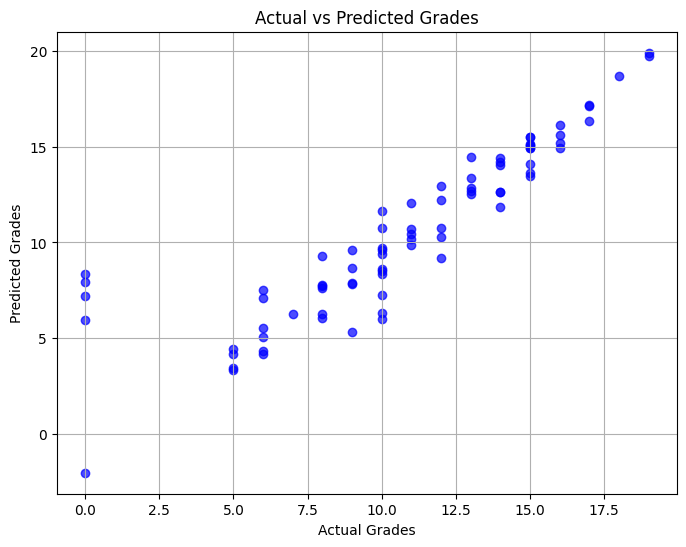

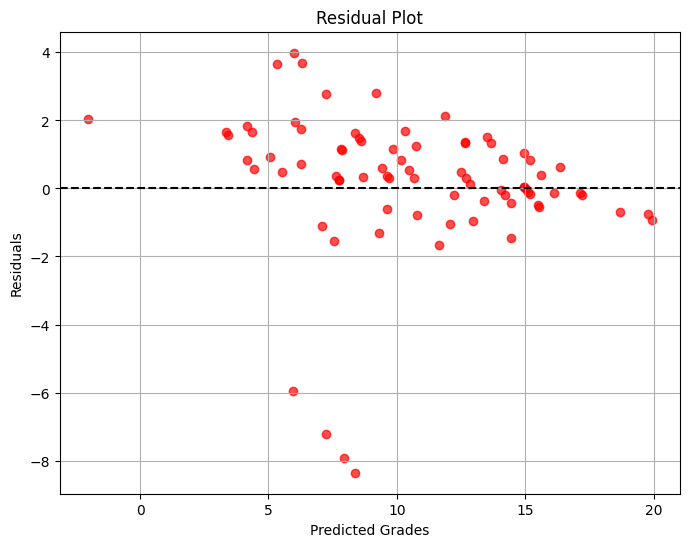

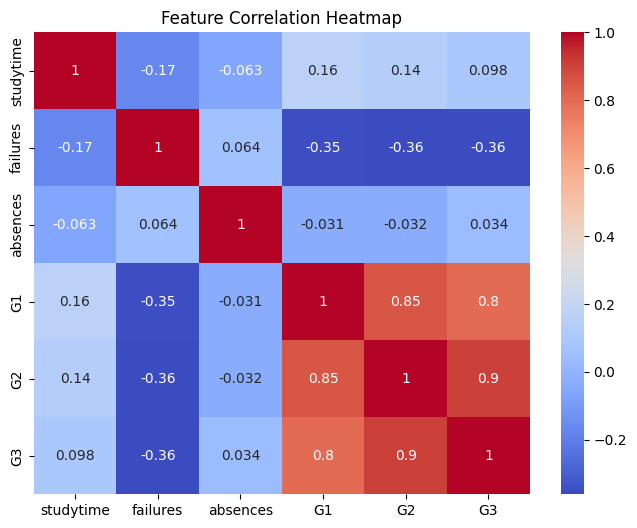

In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from google.colab import files
import os

# Step 2: Upload and extract the outer ZIP file
print("Please upload the ZIP file containing the dataset:")
uploaded = files.upload()

# Extract the outer ZIP file
outer_zip_path = list(uploaded.keys())[0]  # Get the uploaded ZIP file name
with zipfile.ZipFile(outer_zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")  # Extract files into a directory
    print("\nFiles extracted to '/content/dataset'")

# Check extracted files
print("\nExtracted files:")
print(os.listdir("/content/dataset"))

# Step 3: Check for a nested ZIP file
nested_zip_path = "/content/dataset/student.zip"  # Path to the nested ZIP file
if os.path.exists(nested_zip_path):
    print("\nExtracting nested ZIP file...")
    with zipfile.ZipFile(nested_zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/dataset/nested")  # Extract files into a new directory
        print("\nNested files extracted to '/content/dataset/nested'")

# Check nested extracted files
print("\nNested extracted files:")
print(os.listdir("/content/dataset/nested"))

# Step 4: Load the CSV file
# Path to the CSV file inside the extracted folder
csv_path = "/content/dataset/nested/student-mat.csv"  # Update if file name or path differs
df = pd.read_csv(csv_path, sep=';')  # ';' is used as the delimiter in this dataset

# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Step 5: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Step 6: Feature Selection
# Selecting relevant features based on dataset documentation
features = ['studytime', 'failures', 'absences', 'G1', 'G2']  # Example features
target = 'G3'  # Final grade

X = df[features]
y = df[target]

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("\nModel Coefficients:", model.coef_)

# Step 9: Make predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 11: Visualization - Actual vs Predicted Grades
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Grades")
plt.grid()
plt.show()

# Step 12: Visualization - Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Grades")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid()
plt.show()

# Step 13: Visualization - Feature Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
